In [1]:
# dependancies
import pandas, json, numpy, seaborn
import matplotlib.pyplot as plt

In [2]:
switcher = json.load(open("power 5 schools.txt"))

In [3]:
# this cell reserved for testing
with open("actually_final_i_promise.csv") as inbox:
    DF = pandas.read_csv(inbox)
DF.head()

,Unnamed: 0,Unnamed: 0_x,Player_Id,Team_Id,Name,Year,Position,Games_Played,passing yards,passing touchdowns,...,receiving yards,receiving touchdowns,receptions,kick returns,punt returns,total annual points,Unnamed: 0_y,player_id,name,college
0,0,0,05b0c05e-ec5b-4c41-9ff6-55ffcbdab955,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Alex Van Pelt,2000,QB,1,2.68,0,...,0.0,0,0,0,0,2.68,0,05b0c05e-ec5b-4c41-9ff6-55ffcbdab955,Alex Van Pelt,Pittsburgh
1,1,1,1454f252-2a45-4a4d-bce6-c9a4958514cb,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Jeremy McDaniel,2000,WR,16,0.00,0,...,69.7,12,43,0,0,81.70,1,1454f252-2a45-4a4d-bce6-c9a4958514cb,Jeremy McDaniel,Arizona
2,2,2,229596c9-a494-4293-8bbc-76203995b92f,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Shawn Bryson,2000,RB,16,0.00,0,...,27.1,12,32,0,0,96.20,2,229596c9-a494-4293-8bbc-76203995b92f,Shawn Bryson,Tennessee
3,3,3,34147754-f18a-4071-9895-dd541c78260e,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Doug Flutie,2000,QB,11,68.00,32,...,0.0,0,0,0,0,106.10,3,34147754-f18a-4071-9895-dd541c78260e,Doug Flutie,Boston College
4,4,4,39536e35-74fb-4287-8550-1304b16256a5,768c92aa-75ff-4a43-bcc0-f2798c2e1724,Jay Riemersma,2000,TE,12,0.00,0,...,37.2,30,31,0,0,65.20,4,39536e35-74fb-4287-8550-1304b16256a5,Jay Riemersma,Michigan


In [4]:
def setup(df, x, y, function):
    """Takes a dataframe, two column names from it and a lambda function to be applied to a loc of the dataframe to return an int. returns a dataframe set up per spec"""
    result = {}
    for each in df[x].unique():
        result[each] = {}
        for other in df[y].unique():
            ball = df.loc[df[x] == each]
            ball = ball.loc[ball[y] == other]
            result[each][other] = function(ball)
    return pandas.DataFrame(result)

In [24]:
# this cell reserved for testing
ball = DF
def throw(inbox):
    if inbox in switcher:
        return switcher[inbox]
    else:
        return "other"
ball["conference"] = ball["college"].map(throw)
ball = setup(ball, "conference", "Position", lambda x: x["total annual points"].sum()).transpose()
ball = ball.drop("other")
ball

,FB,QB,RB,TE,WR
ACC,1349.90,8845.70,20025.28,6776.94,26151.20
Big 10,1934.16,16609.30,19502.50,8846.94,24641.10
Big 12,364.40,3527.60,13539.16,3125.40,11190.60
PAC12,1086.18,12877.08,14465.22,10558.00,14866.38
SEC,742.30,8124.22,9783.94,4254.28,14447.34


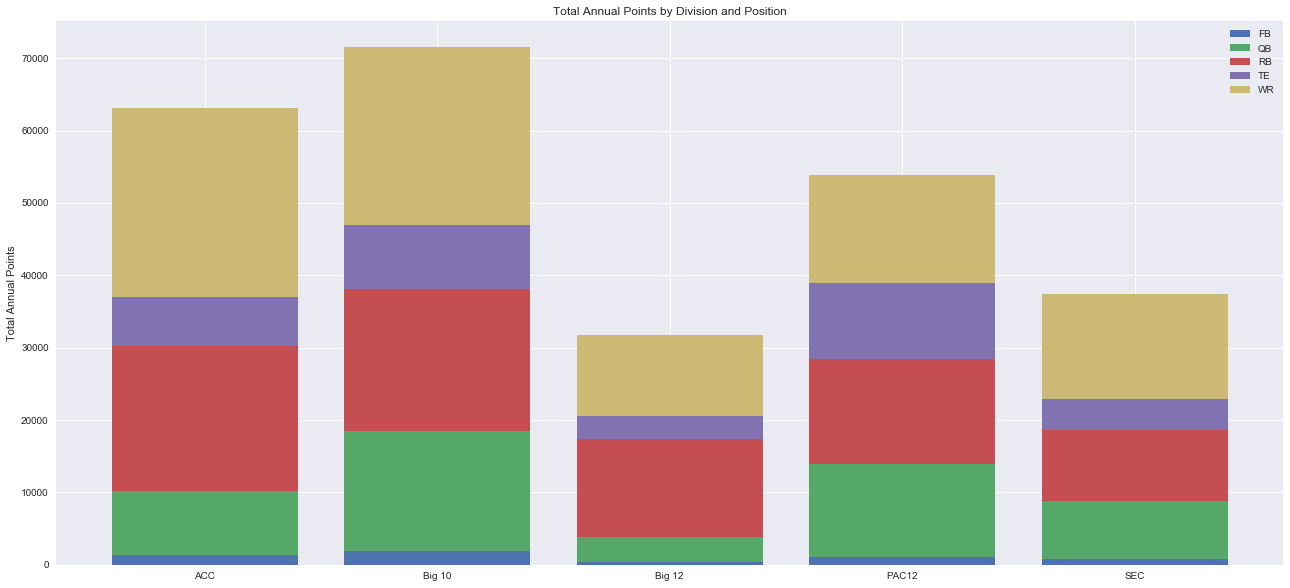

In [33]:
last = pandas.Series(index = ball.index, data = [0])
width = .35
ind = range(len(ball.index))
plt.figure(figsize = (22, 10))
for position in ball.columns:
    plt.bar(ind, list(ball[position]), bottom=last)
    last = ball[position].add(last)
plt.xticks(ind, ball.index)
plt.ylabel('Total Annual Points')
plt.title('Total Annual Points by Division and Position')
plt.style.use('seaborn')
plt.legend(ball.columns)
plt.savefig("stacked_bar.png")
plt.show()

ACC        63149.02
Big 10     71534.00
Big 12     31747.16
PAC12      53852.86
SEC        37352.08
other     213424.00
dtype: float64
FB
(6,)
(6,)
(6,)
QB
(6,)
(6,)
(6,)
RB
(6,)
(6,)
(6,)
TE
(6,)
(6,)
(6,)
WR
(6,)
(6,)
(6,)
